diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


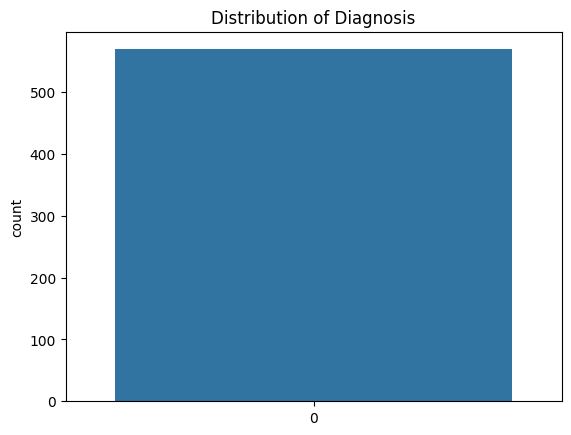

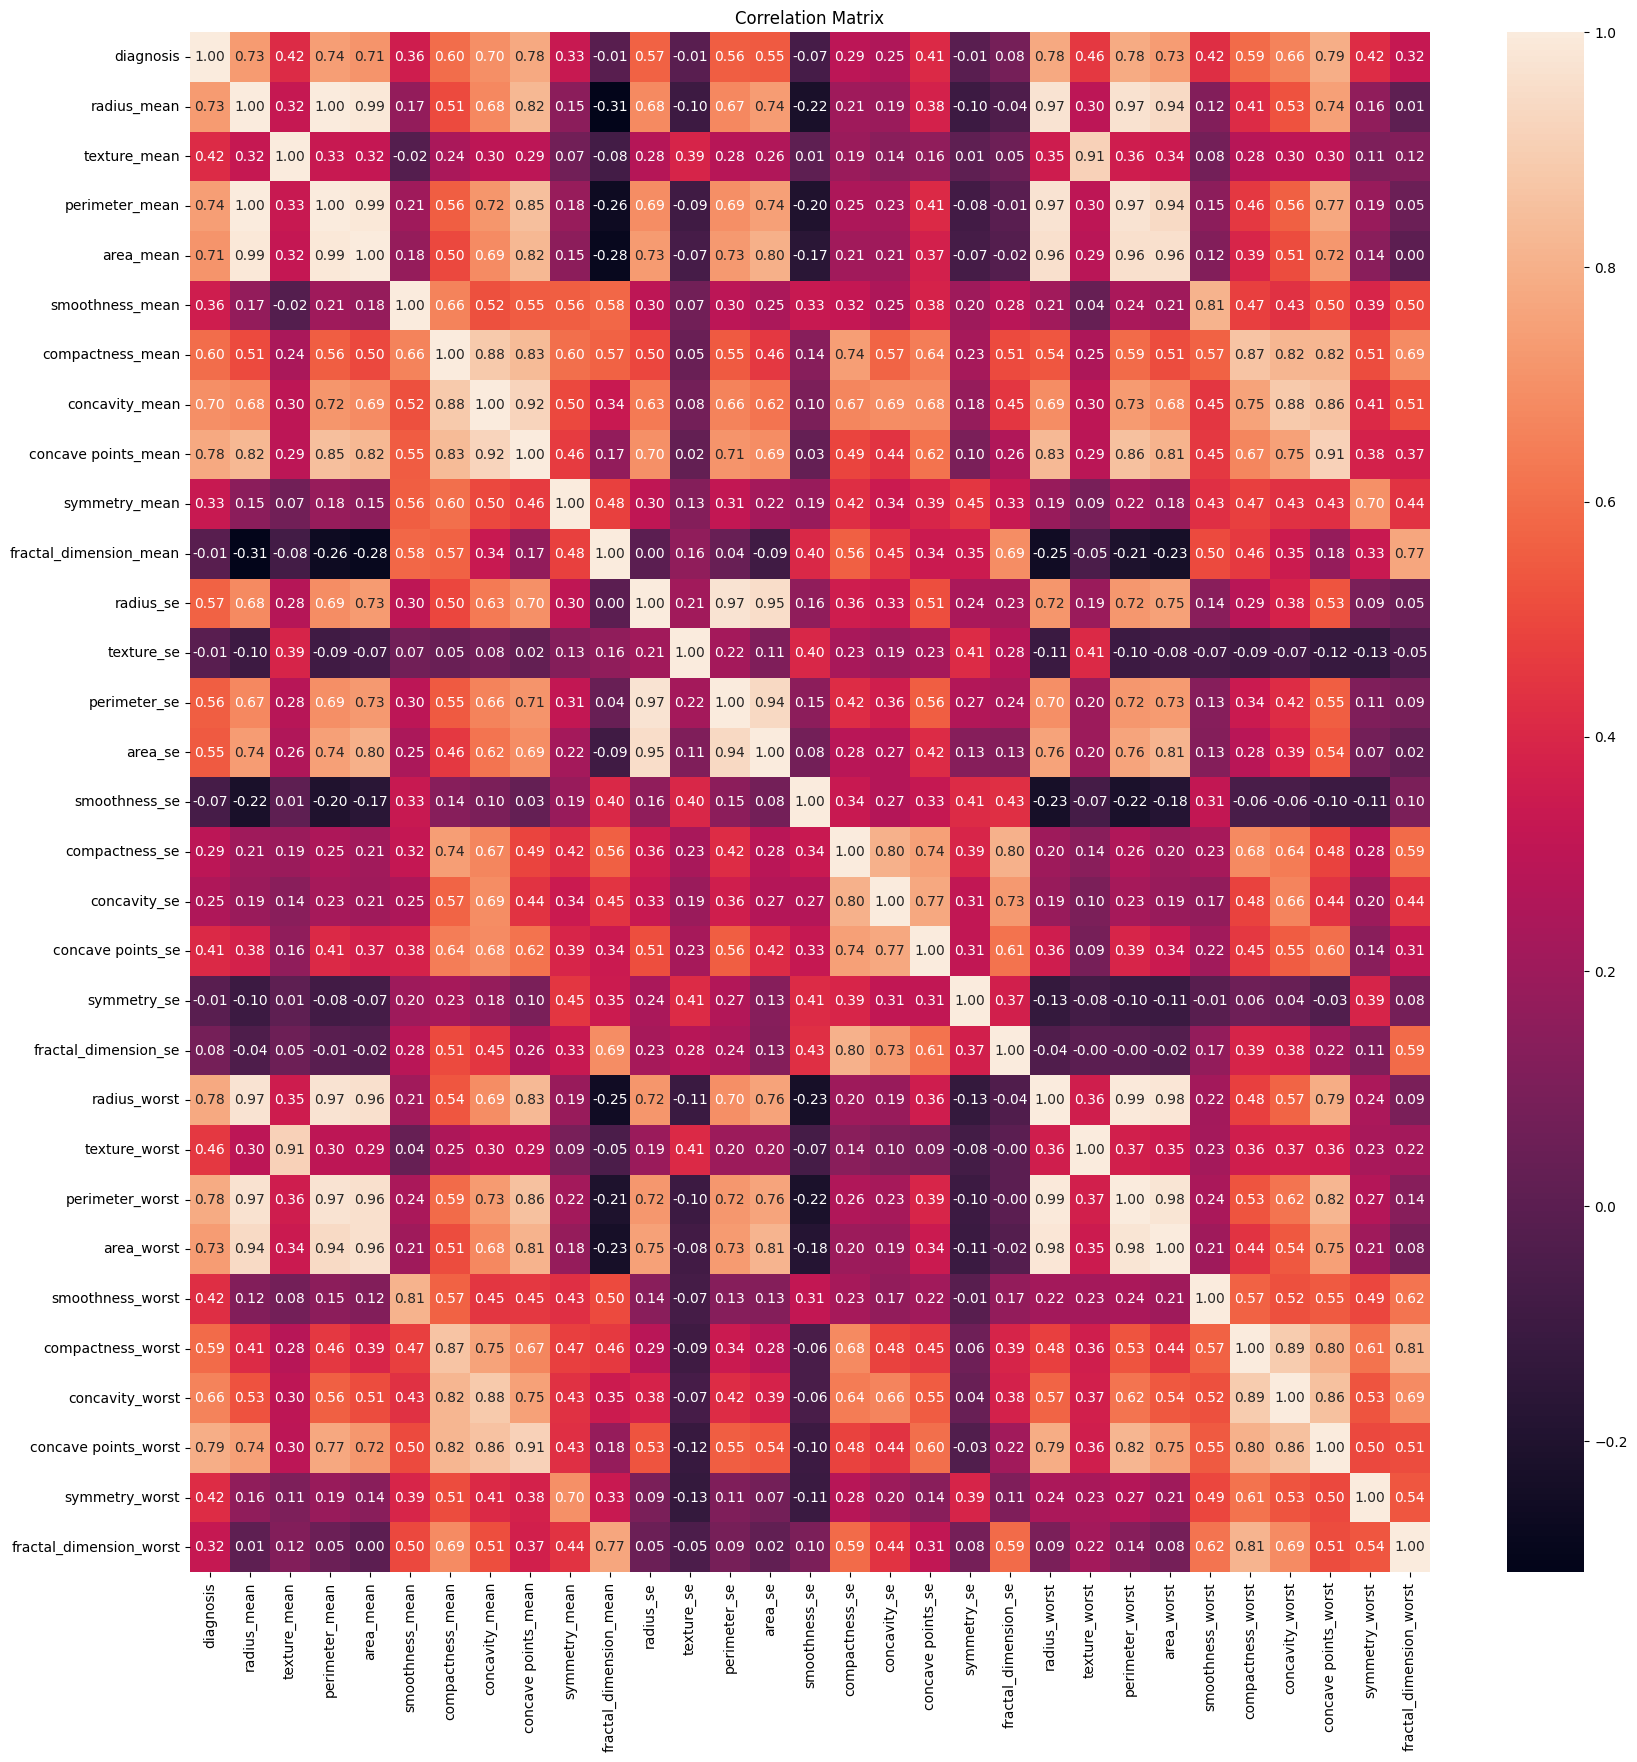

Confusion Matrix:
[[70  1]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Accuracy Score:
0.9649122807017544


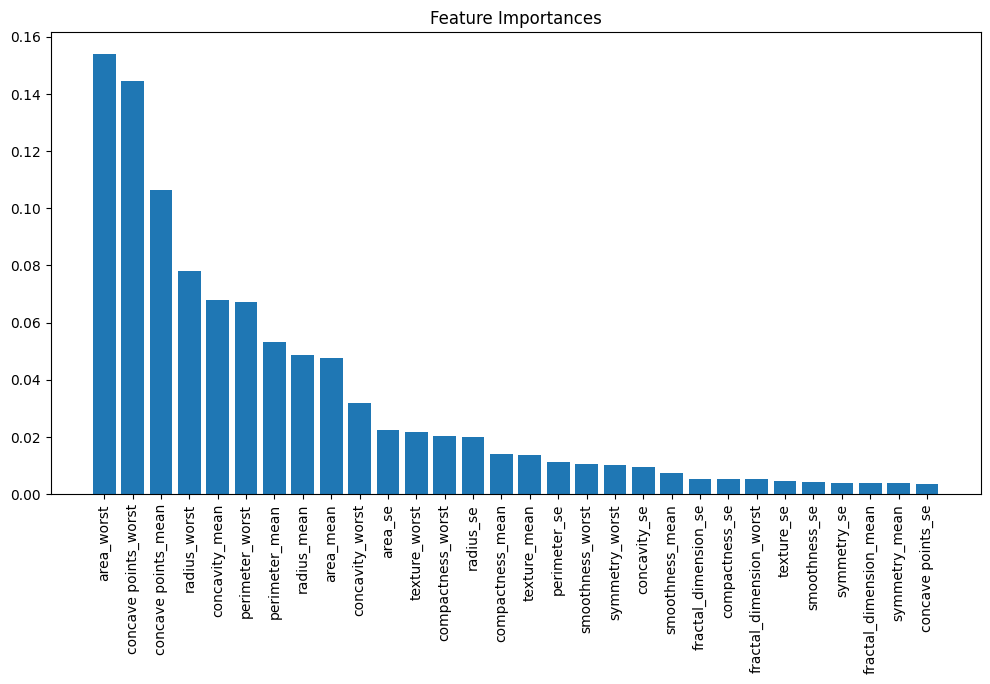

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')


data.drop(['id'], axis=1, inplace=True)
if 'Unnamed: 32' in data.columns:
    data.drop(['Unnamed: 32'], axis=1, inplace=True)


data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


print(data.isnull().sum())


sns.countplot(data['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.show()


plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.show()
